<a href="https://colab.research.google.com/github/HJoonKwon/ml_fundamentals/blob/main/K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## K-Means Clustring Algorithm 
- An unsupervised learning algorithm (no dependent variables, only independent ones)

### What does it do?
- Segment the data points into K number of clusters


### How does it work?
1. Initially randomly select K centroids and each centroid form a cluster.
2. Assign all the data points to the closest clusters
3. Update the centroids to the mean of the assigned data points. 
4. Iterate from 2-4 until the maximum number of iterations is reached or the centroids converge. 


### Limitations 
- Need to find the right number of clusters 
- Need to try multiple iterations because the result depends on initial guess of centroids. 
- Does not work beautifully for data with non-circlular distribution. (e.g. e

In [5]:
import numpy as np 
import seaborn as sns
from sklearn.datasets import make_blobs 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler 

from ml_algorithms.kmeans_clustering import * 

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(42)

### 1) Create the dataset
- We do not need labels, but let us define ```y_train``` to evaluate the algorithm later.

In [2]:
X_train, y_train = make_blobs(n_samples=100, centers=5, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_train[0])
print(y_train[0])

(100, 2)
(100,)
[-6.2927701  -4.68965397]
2


### 2) Preprocess the data

In [3]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

### 3) Visualize the data 

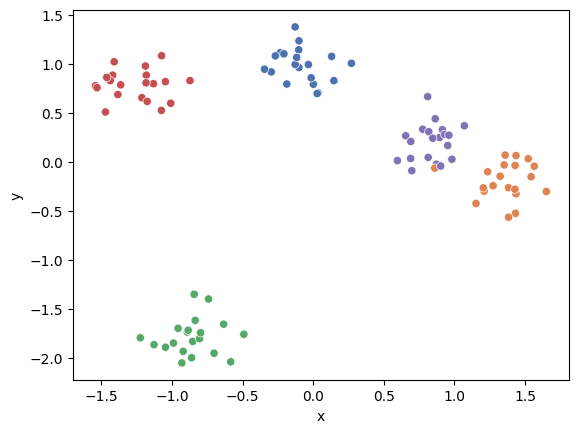

In [4]:
sns.scatterplot(x=[X[0] for X in X_train],
                y=[X[1] for X in X_train],
                hue=y_train,
                palette='deep',
                legend=None)

plt.xlabel('x')
plt.ylabel('y')
plt.show()

### 5) Implementation 

In [22]:
import inspect
lines = inspect.getsource(KMeans)
print(lines)

class KMeans():
    def __init__(self):
        self.n_clusters = 5
        self.iterations = 300

    def fit(self, X: np.ndarray, n_clusters: int = 5, iterations: int = 300) -> tuple[np.ndarray, ...]:
        self.n_clusters = n_clusters
        self.iterations = iterations

        centroids = self.initialize_centroids(X)
        for i in range(iterations):

            distances = self.euclidean(X, centroids)
            centroid_idxs = np.argmin(distances, axis=1)
            for n in range(n_clusters):
                new_centroid = np.mean(X[centroid_idxs==n], axis=0, keepdims=True)
                if np.isnan(new_centroid).any():
                    continue
                centroids[n] = new_centroid

        return centroids, centroid_idxs

    def initialize_centroids(self, X: np.ndarray) -> np.ndarray:
        # X: (number of examples, number of features)
        min_x, max_x = np.min(X, axis=0), np.max(X, axis=0)
        centroids = np.random.uniform(low=min_x,
           

### 6) Test the algorithm and Visualize the result 

In [49]:
model = KMeans()
centroids, centroid_idxs = model.fit(X_train, n_clusters=5)
print(centroids)

[[-0.08246807  0.98545119]
 [ 0.83815529  0.19285925]
 [-0.85560376 -1.78334025]
 [ 1.38517539 -0.20092083]
 [-1.25790785  0.78626163]]


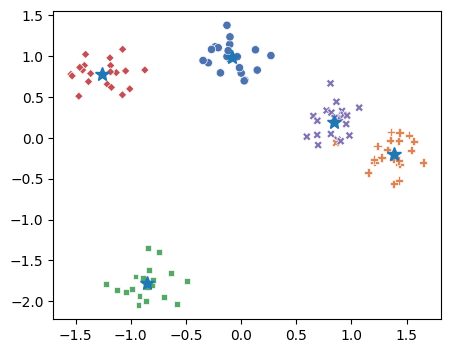

In [50]:
# Visualize 
sns.scatterplot(x=[X[0] for X in X_train],
                y=[X[1] for X in X_train],
                hue=y_train,
                style=centroid_idxs,
                palette='deep',
                legend=None)
plt.plot([x for x, _ in centroids],
         [y for _, y in centroids],
         '*',
         markersize=10)
plt.show()

## References
- https://towardsdatascience.com/create-your-own-k-means-clustering-algorithm-in-python-d7d4c9077670
